In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
slr_df= pd.read_csv("https://raw.githubusercontent.com/swapnilsaurav/Dataset/master/student_scores.csv")
print("Column in the dataset \n",slr_df.columns)

Column in the dataset 
 Index(['Hours', 'Scores'], dtype='object')


In [3]:
slr_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
slr_df.shape

(32, 2)

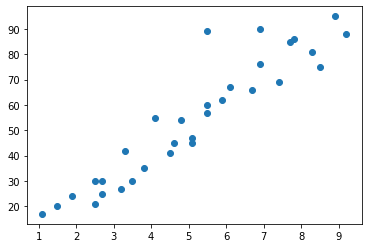

In [5]:
plt.scatter(slr_df['Hours'], slr_df['Scores'])
plt.show()

In [6]:
#preparing dataset into train and test
x= pd.DataFrame(slr_df.iloc[:,0])
y=pd.DataFrame(slr_df.iloc[:,1])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=1)

In [7]:
#train algoritham
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#finding intercept values
print("Intercept value", regressor.intercept_)
print("Coefficent value", regressor.coef_)

Intercept value [1.22803118]
Coefficent value [[10.35837991]]


In [9]:
#making prediction
y_pred= regressor.predict(x_test)
y_pred= pd.DataFrame(y_pred, columns=["predicted"])
y_pred

,predicted
0,29.195657
1,89.274260
2,93.417612
3,62.342473
4,27.123981
5,80.987556
6,12.622249


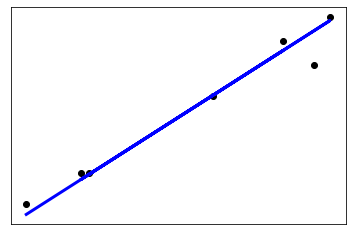

In [10]:
#plot train data output
plt.scatter(x_test, y_test, color='Black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [11]:
#Evaluating Model
import numpy as np
from sklearn import metrics
explained_variance= metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error= metrics.mean_absolute_error(y_test, y_pred)
mse= metrics.mean_squared_error(y_test, y_pred)
mean_squared_log_error= metrics.mean_squared_log_error(y_test, y_pred)
median_absolute_error= metrics.median_absolute_error(y_test, y_pred)
r2= metrics.r2_score(y_test, y_pred)


In [12]:
print('Explained_variance: ', round(explained_variance,2))
print('Mean_Squared_Log_Error: ', round(mean_squared_log_error,2))
print('R_Squared: ', round(r2,4))
print('Mean_Absolute_Error: ', round(mean_absolute_error,2))
print('Mean_Squared_Error: ', round(mse,2))
print('Root_Mean_Squared_Error: ', round(np.sqrt(mse),2) )

Explained_variance:  0.96
Mean_Squared_Log_Error:  0.02
R_Squared:  0.9555
Mean_Absolute_Error:  4.04
Mean_Squared_Error:  35.79
Root_Mean_Squared_Error:  5.98


In [13]:
#statistical Analysis
from statsmodels.api import OLS
import statsmodels.api as sm
#in our model, y will be dependent on two values: coefficient and constant
#so we need to add additional column in x for constant value
x= sm.add_constant(x)
summ=OLS(y, x).fit().summary()
print("Summary of the dataset: \n", summ)


Summary of the dataset: 
                             OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     207.5
Date:                Sat, 13 Feb 2021   Prob (F-statistic):           5.12e-15
Time:                        09:23:28   Log-Likelihood:                -113.92
No. Observations:                  32   AIC:                             231.8
Df Residuals:                      30   BIC:                             234.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0859     

# Interpritation